In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def forward(x, h):
    value = (np.cos(x+h)-np.cos(x))/h
    return value

def central(x, h):
    value = (np.cos(x+h)-np.cos(x-h))/(2*h)
    return value

In [19]:
h = 1e-7
xs = [0.1, 1.0, 100]

for x in xs:
    print('x = ', x)
    print('forward: ', forward(x, h))
    print('central: ', central(x, h))

x =  0.1
forward:  -0.09983346704878215
central:  -0.09983341653363453
x =  1.0
forward:  -0.8414710128690217
central:  -0.8414709851134461
x =  100
forward:  0.5063655683645862
central:  0.5063656111081727


In [3]:
hs = np.logspace(-2, -15)
x = 1.0

forward_results = []
central_results = []

for h in hs:
    forward_results.append(forward(x, h))
    central_results.append(central(x,h))

forward_results = np.array(forward_results)
central_results = np.array(central_results)

forward_errs = np.abs((forward_results + np.sin(x))/(-np.sin(x)))
central_errs = np.abs((central_results + np.sin(x))/(-np.sin(x)))

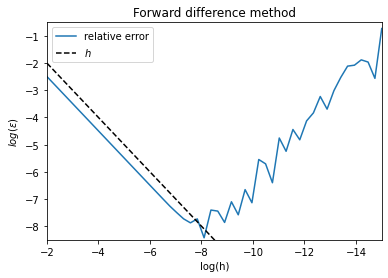

In [22]:
## Forward difference
fig, ax = plt.subplots()
ax.set(
    xlabel='log(h)',
    ylabel='$log(\epsilon)$',
    # xscale='log',
    # yscale='log',
    # ylim=[10**(-8.5),10**(-0.5)],
    # xlim=[10**(-2), 10**(-15)],
    xlim=[-2, -15],
    ylim=[-8.5, -0.5],
    title='Forward difference method'
)
ax.plot(np.log10(hs), np.log10(forward_errs), label = 'relative error')
ax.plot(np.log10(hs), np.log10(hs), '--k', label='$h$')
ax.legend()

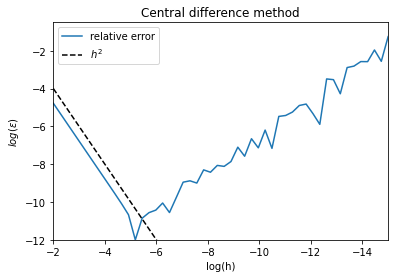

In [4]:
## Central difference
fig, ax = plt.subplots()
ax.set(
    xlabel='log(h)',
    ylabel='$log(\epsilon)$',
    # xscale='log',
    # yscale='log',
    # ylim=[10**(-12),10**(-0.5)],
    # xlim=[10**(-2), 10**(-15)],
    xlim=[-2, -15],
    ylim=[-12, -0.5],
    title='Central difference method'
)
ax.plot(np.log10(hs), np.log10(central_errs), label = 'relative error')
ax.plot(np.log10(hs), np.log10(hs**2), '--k', label='$h^2$')
ax.legend()